In [ ]:
!nvidia-smi

Mon Aug 16 07:23:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 458.3 MB 11 kB/s 
     |████████████████████████████████| 4.3 MB 51.5 MB/s 
     |████████████████████████████████| 1.3 MB 63.1 MB/s 
     |████████████████████████████████| 5.6 MB 61.4 MB/s 
     |████████████████████████████████| 462 kB 65.5 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30692 sha256=a6fffef237992d26ba6566d28cd8cb0f812733325d0268fe1b6cb36f9cc6cbc1
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
Successfully built clang
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: 

In [ ]:
TRAIN_PATH="/content/drive/MyDrive/dataset/train"
VAL_PATH="/content/drive/MyDrive/dataset/Val"


In [ ]:
import numpy as np
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image



In [ ]:
#cnn based model in keras
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer="adam",metrics=["accuracy"])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

In [ ]:
#training
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_dataset=image.ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator=train_datagen.flow_from_directory(
    "/content/drive/MyDrive/dataset/train",target_size=(224,224),
    batch_size=32,
    class_mode="binary"

)

Found 392 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [ ]:
validation_generator=train_datagen.flow_from_directory(
    VAL_PATH,target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)


Found 53 images belonging to 2 classes.


In [ ]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
hist=model.fit(
    train_generator,steps_per_epoch=10,epochs=8,
    validation_data=validation_generator,
    validation_steps=2
)

Epoch 1/8
10/10 [==============================] - 148s 14s/step - loss: 0.7303 - accuracy: 0.4662 - val_loss: 0.6909 - val_accuracy: 0.5283
Epoch 2/8
10/10 [==============================] - 33s 3s/step - loss: 0.6755 - accuracy: 0.6250 - val_loss: 0.5916 - val_accuracy: 0.8868
Epoch 3/8
10/10 [==============================] - 15s 2s/step - loss: 0.4500 - accuracy: 0.8074 - val_loss: 0.4126 - val_accuracy: 0.8302
Epoch 4/8
10/10 [==============================] - 16s 2s/step - loss: 0.2686 - accuracy: 0.8885 - val_loss: 0.1898 - val_accuracy: 0.9623
Epoch 5/8
10/10 [==============================] - 15s 1s/step - loss: 0.2058 - accuracy: 0.9392 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 6/8
10/10 [==============================] - 15s 1s/step - loss: 0.2038 - accuracy: 0.9426 - val_loss: 0.0720 - val_accuracy: 0.9811
Epoch 7/8
10/10 [==============================] - 14s 1s/step - loss: 0.1398 - accuracy: 0.9459 - val_loss: 0.2111 - val_accuracy: 1.0000
Epoch 8/8
10/10 [========

In [ ]:
model.save("/content/gdrive/MyDrive/model_adv.h5")

In [ ]:
model.evaluate(train_generator)

13/13 [==============================] - 15s 1s/step - loss: 0.1224 - accuracy: 0.9770


[0.1224246621131897, 0.9770408272743225]

In [ ]:
model.evaluate(validation_generator)

2/2 [==============================] - 2s 816ms/step - loss: 0.0363 - accuracy: 1.0000


[0.03633473441004753, 1.0]

**testing**

In [ ]:
model=load_model('/content/gdrive/MyDrive/model_adv.h5')

In [ ]:
import os

In [ ]:
y_actual=[]
y_test=[]

In [ ]:
for i in os.listdir("/content/gdrive/MyDrive/dataset/Val/Normal"):
  img=image.load_img("/content/gdrive/MyDrive/dataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
for i in os.listdir("/content/gdrive/MyDrive/dataset/Val/Covid"):
  img=image.load_img("/content/gdrive/MyDrive/dataset/Val/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)



/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual,y_test)

In [ ]:
import seaborn as sns

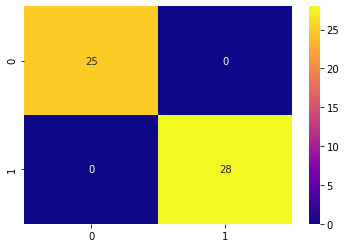

In [ ]:
sns.heatmap(cm,cmap="plasma",annot=True)